# PROBLEM STATEMENT

In [1]:
'''I) It would be useful if you download the dataset and save the csv as "UTF-8" encoding for the python code to read it.
   II) I have attached the dataset
'''
# Output 1 (Characterize the search results in a few sentences.)

# Upon search of 'customer segmentation' on kaggle, a number of dataset where shown as results. Chose an
# e-commerce transaction dataset of a platform based in United Kingdom. 

# Output 2 (Characterize the search results in a few sentences.)

# After selection of dataset, the for a e-commerce database compnay which spans over a period of year
# (from 2010/12/01 to 2011/12/09). This dataset was chosen since it had various parameter in which analysis can be 
# done. Majorly this dataset helps us to find solutions to problems given below.
# Description of Columns : 
''' Invoice no : 6 digit number of each trasnaction
    Stockcode : Product Code (unique for each product)
    Description : Product item 
    Quantity : The quantites of each product per transaction
    InvoiceDate : Date of purchase
    Unit Price : Price per unit of product
    CustomerID : Unique ID per customer
    Country : Country of each transaction
'''


# Output 3 (Describe a relevant/interesting problem or question in a few sentences)

# 1)  Which products has been sold the most ?
# 2) Segment the customers based on the highest number of spendings ? (highest, medium, lowest)
# ( most profitable, least profitable and medium profitable) depending on the spendings (customer segementation)
# 3) Customer retension - Total number of customers who have shopped only once Vs. Number of customers who have 
# Shopped more than 10 times.
# 4) Which foreign country makes the most revenue per customer for company ?


#Output 4

''' 1) In order to suffice the demand for most selling products, the e-commerce platform 
    needs to know which are it's highest selling products in the market.
    This problem can be solved by the following approach:
      a) Segregate the dataset depending upon the unique product code or description by grouping them
      b) Count the total number of products per group to know the top selling products for the company
  
    2) To segment the customers based on their expenditure on website is useful in many ways. By knowing which group of customers
      should be targetted, customer monetization can be boosted. Profitable customers can be given special discounts and offers 
      with the motive of bringing them back to the website (customer retention). Also, different strategies can be devised for
      customers who tend to spend less. Referral promotions can be broadcasted among customers who spend less, so that they get benefits
      by referring new customers to the website. As a result, this tackles the problem of new customer acquisition as well, which
      brings in more business to the company.
      Approach :
        a) Grouped the dataset based on customers. 
        b) Calculated the sum of each transaction per customer to get the cumulative amount spend by every customer
        c) Calculated the sum of each transaction per customer to get the cumulative quantites purchased by every customer
        d) Removed the outliers to target majorily of the customers.
        e) Applied normalization to scale the dataset for better Machine Learning results.
        f) Plotted the 'elbow curve' to decide the optimal 'k'(number of clusters) 
        h) Applied kmeans clustering from sklearn package and cluster depending on 3 variables
        i) 2D and 3D, visualized the clustering results. Used 3D to plot all the 3 features which led to clustering
  
    3) Approach:
        a) Categorized the customers based on the total number of transactions done.
        b) Created different dataframes for customers who had one trasaction but never returned
        c) Created different dataframes for customers who had multiple transactions on website.
        d) Plotted a pie chart to show the contract between the customers who never returned and regular customers
        e) Calculated the percentage of customers who had more than one transaction.
  
    4) When it comes to expanding a business, it is important to consider foreign lands as well. This helps a company to target 
      the countries where it has more chances of market penetration and acquire new customers. A good indication of such approach, 
      is to find the revenue generated per customer. High the ratio, more are the chances of making revenue.
      Approach :
        a) Put together different countries and account for cumulative no of transactions per country
        b) Calculate the cumulative of total revenue generated according to a particular country.
        c) Evaluate the ratio 'Revenue per customer' on the basis of different companies.
        d) Plot the results
        
''' 
#Output 6
''' 1) We can see that 'plot_products' shows us the product called 'WHITE HANGING HEART T-LIGHT HOLDER'
    is sold the most on the website. Therefore, next time the company can order this product more which may lead
    to more revenue. These top products may also be excluded from 'discounted products' with a notion that these may tend to
    sell evenif there is less or no discount on them due to its high demand on website. Different variations can be 
    added to these products in an attempt to increase profit.
    
    2) From the visualization, 'fig1', we can see that there are 5 clusters formed each having different features. As a result, 
        the entire group of customers has been clusters and various strategies can be implemented using this approach.
        For example, 'Cluster-1' can be given promo codes as an incentive to spend more on the website.
        Different clusters can be seen in the 3-D plot.

    3) Out of total customers, 98 % had more than one transactions with the website.
  
    4) It can be seen that 'Portugal' is the country where the ratio of 'Revenue_Per_Customer' is the highest which is 
      good country to expand the e-commerce's market.
  
        
'''
#Output 5

" 1) We can see that 'plot_products' shows us the product called 'WHITE HANGING HEART T-LIGHT HOLDER'\n    is sold the most on the website. Therefore, next time the company can order this product more which may lead\n    to more revenue. These top products may also be excluded from 'discounted products' with a notion that these may tend to\n    sell evenif there is less or no discount on them due to its high demand on website. Different variations can be \n    added to these products in an attempt to increase profit.\n    \n    2) From the visualization, 'fig1', we can see that there are 5 clusters formed each having different features. As a result, \n        the entire group of customers has been clusters and various strategies can be implemented using this approach.\n        For example, 'Cluster-1' can be given promo codes as an incentive to spend more on the website.\n        Different clusters can be seen in the 3-D plot.\n\n    3) Out of total customers, 98 % had more than one tr

In [3]:

#  preprocessing process

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

dataset_entire = pd.read_csv('C:/data/Practise/e-commerce_dataset.csv')#load the dataset

dataset_entire.isna().sum() #check the no. of mssing values

# There are 135080 missing values in "Customer ID" (before discarding)

dataset = dataset_entire[~dataset_entire['CustomerID'].isnull()] #deleted the missing values of ID, since values cannot be replaced
dataset = dataset.dropna(axis='columns')

E:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Quantity')

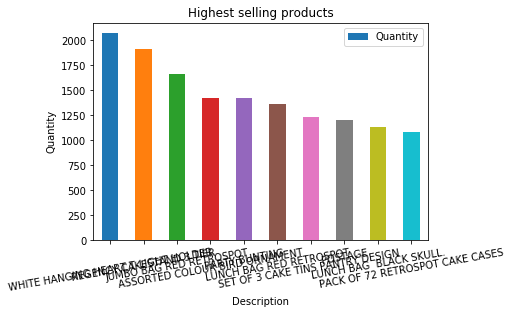

In [5]:
# Solving the problem

# 1) 

products_df = dataset.iloc[:,2:7].groupby(by = ['Description']).count()
products_df = pd.DataFrame(products_df)
products_df = pd.DataFrame(products_df).reset_index()

#The movies with highest number of movies
top_products_df = products_df.nlargest(10, 'Quantity')
plot_products = top_products_df.plot(x = 'Description', y = 'Quantity',
                                     kind = 'bar',rot = 10,title = 'Highest selling products')
labels = list(top_products_df.iloc[:,0])
sizes = list(top_products_df.iloc[:,1])
#patches, texts = plot_products.plot(sizes)
plot_products.set_xlabel("Description")
plot_products.set_ylabel("Quantity") #Enlarge the plot


      CustomerID  TotalPrice  TotalQuantity  Avg_Spent
0          12346        2.08              0        inf
89         12454      218.46              0        inf
170        12558       27.50              0        inf
213        12607      435.86              0        inf
440        12908        2.09              0        inf
775        13364       51.96              0        inf
1059       13762       17.64              0        inf
1642       14557       50.88              0        inf
1809       14792       12.40              0        inf
3349       16878        9.50              0        inf
4256       18133        0.85              0        inf
4358       18268       25.50              0        inf
4363       18274       80.78              0        inf


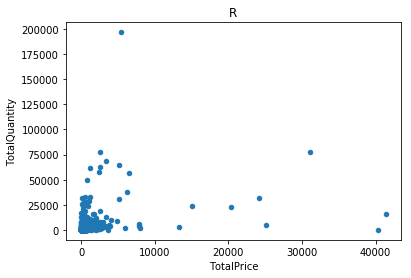

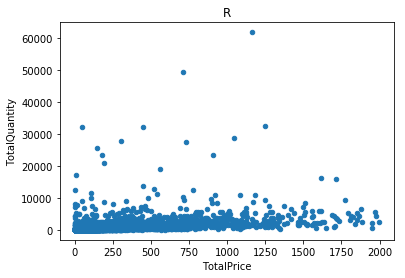

In [6]:

# 2) 

spendings_df = dataset.groupby(by = ['CustomerID'])['UnitPrice','Quantity'].sum()
spendings_df = pd.DataFrame(spendings_df)
spendings_df = pd.DataFrame(spendings_df).reset_index()
spendings_df = spendings_df.rename(index=str,
                                   columns={"UnitPrice": "TotalPrice","Quantity": "TotalQuantity"})
spendings_df['Avg_Spent'] = spendings_df['TotalPrice']/spendings_df['TotalQuantity']
spendings_df['CustomerID'] = spendings_df['CustomerID'].astype(int)


spendings_df_inf = spendings_df[spendings_df.TotalQuantity == 0] #Removing the outliers
print(spendings_df_inf)

spendings_df = spendings_df[spendings_df.TotalQuantity > 0] 
#Quantity cannot be negative(Earlier analysis showed that there were negative values in Quantity )

#Count number of customers who purchased 0, but paid spend amount
# An interestng observation according to the dataset is the amount spend is recorded, however,
# the quantity puurchased is 0

#One of the Assumption can be that these Customers paid the bill for the commodity but the product was not
# dispatched or delivered to them. This may have negative impact on the company's website.

plot_spendings_scatter = spendings_df.plot(x = 'TotalPrice', y = 'TotalQuantity',
                                     kind = 'scatter',title = 'R') 
#Plots shows the outliers for clustering



#Removing the outliers while 
spendings_df_high = spendings_df[spendings_df.TotalQuantity < 25000] #Considering people who are regular customers
spendings_df_high = spendings_df[spendings_df.TotalPrice < 2000] #Considering people who are regular customers

plot_spendings_scatter_range = spendings_df_high.plot(x = 'TotalPrice', y = 'TotalQuantity',
                                     kind = 'scatter',title = 'R') 


[[ 7.70443686e-01  3.23069729e-01 -2.49543063e-02]
 [-4.43278796e-01 -2.31396955e-01 -1.07427814e-02]
 [ 3.07630166e+00  1.16241067e+00 -1.82981374e-02]
 [ 1.15666275e+00 -4.09436199e-01  6.08875759e+01]
 [ 1.01925882e+00  1.31525071e+01 -1.33241321e-01]]


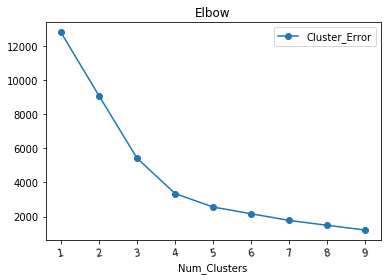

In [7]:
# K-means clustering 

# elbow Plot
scaler = StandardScaler() #Applying normalization
#  (mean = 0 and standard deviation = 1) your features before applying machine learning technique
X_scaled = scaler.fit_transform(spendings_df_high.iloc[:,1:].values)
cluster_range = range(1,10)
cluster_errors = []

for num in cluster_range:
  clusters = KMeans(num)
  clusters.fit(X_scaled)
  cluster_errors.append(clusters.inertia_)
  
cluster_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Error":cluster_errors})
plot_elbow = cluster_df.plot(x = 'Num_Clusters', y = 'Cluster_Error',
                                     kind = 'line',rot = 10,title = 'Elbow',marker = 'o')

# here’s a massive difference between the WSS (within-cluster sum of squares) value of cluster 1 and cluster 5
# so we can take k = 5

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled) #Compute k-means clustering
y_kmeans = kmeans.predict(X_scaled) #Predict the closest cluster each sample in X_scaled belongs to
centers = kmeans.cluster_centers_ #To check the centres
print(centers)

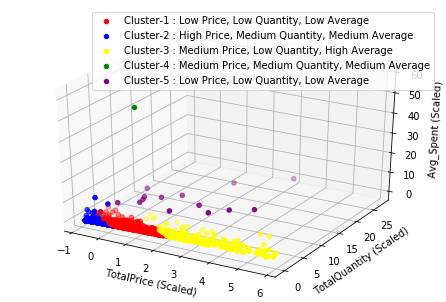

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure() #plot the clustering
ax = Axes3D(fig1)
ax.scatter3D(X_scaled[y_kmeans==0,0], X_scaled[y_kmeans==0,1], X_scaled[y_kmeans==0,2],c='red')
ax.scatter3D(X_scaled[y_kmeans==1,0], X_scaled[y_kmeans==1,1], X_scaled[y_kmeans==1,2],c='blue')
ax.scatter3D(X_scaled[y_kmeans==2,0], X_scaled[y_kmeans==2,1], X_scaled[y_kmeans==2,2],c='yellow')
ax.scatter3D(X_scaled[y_kmeans==3,0], X_scaled[y_kmeans==3,1], X_scaled[y_kmeans==3,2],c='green')
ax.scatter3D(X_scaled[y_kmeans==4,0], X_scaled[y_kmeans==4,1], X_scaled[y_kmeans==4,2],c='purple')
ax.set_xlabel('TotalPrice (Scaled)')
ax.set_ylabel('TotalQuantity (Scaled)')
ax.set_zlabel('Avg_Spent (Scaled)')
ax.legend(["Cluster-1 : Low Price, Low Quantity, Low Average",
           "Cluster-2 : High Price, Medium Quantity, Medium Average",
           "Cluster-3 : Medium Price, Low Quantity, High Average",
           "Cluster-4 : Medium Price, Medium Quantity, Medium Average",
           "Cluster-5 : Low Price, Low Quantity, Low Average"])
plt.show()

Percentage of customers returned :  98 %


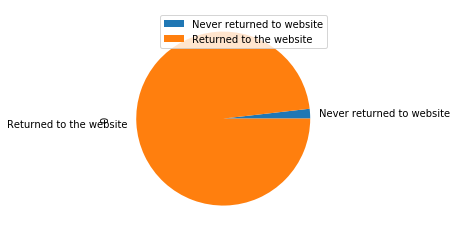

In [9]:
#3
customer_retention = dataset.groupby(by = ['CustomerID'])['InvoiceNo'].count()
customer_retention = pd.DataFrame(customer_retention).reset_index()
customer_retention_once = customer_retention[customer_retention.InvoiceNo == 1]
customer_retention_multiple = customer_retention[customer_retention.InvoiceNo > 1]
customer_retention_plot = pd.DataFrame([customer_retention_once.shape[0],
                                        customer_retention_multiple.shape[0]],
                                        index = ['Never returned to website',
                                                 'Returned to the website'])
customer_retention_plot.plot(kind = 'pie',subplots = True)
print("Percentage of customers returned : ",
      (int((customer_retention_multiple.shape[0]/customer_retention.shape[0])*100)),"%")

Text(0, 0.5, 'Country')

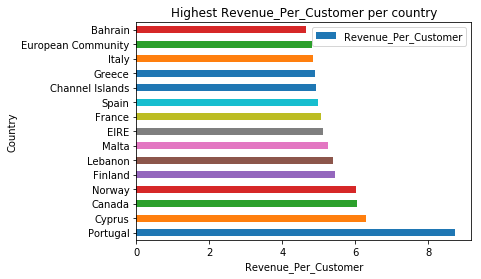

In [10]:
#4

country_retension = dataset.groupby(by = ['Country'])['CustomerID'].count()
country_retension = pd.DataFrame(country_retension).reset_index()
trans_country_retension = dataset.groupby(by = ['Country'])['UnitPrice'].sum()
trans_country_retension = pd.DataFrame(trans_country_retension).reset_index()
country_per_customer = country_retension.merge(trans_country_retension,how='inner',
                                               on = 'Country')
country_per_customer = country_per_customer.rename(index=str,
                                   columns={"CustomerID": "TotalCustomers",
                                            "UnitPrice": "TotalPrice"})
country_per_customer['Revenue_Per_Customer']= country_per_customer['TotalPrice']/country_per_customer['TotalCustomers']

most_country_per_customer = country_per_customer.nlargest(16, 'Revenue_Per_Customer')
most_country_per_customer = most_country_per_customer.iloc[1:,:]#Since our goal was to find out revenue outside UK
Plot_country_customer = most_country_per_customer.plot(x = 'Country', y = 'Revenue_Per_Customer',
                                     kind = 'barh',title = 'Highest Revenue_Per_Customer per country')
Plot_country_customer.set_xlabel("Revenue_Per_Customer")
Plot_country_customer.set_ylabel("Country") #Enlarge the plot
